# Random Forest Classifier

will be a different form of classification. 

In [15]:
# imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('cleaned_data.csv')
clustered_data = pd.read_csv('cluster_labels.csv')
df.head()

,Year,Customer Age,Customer Gender,Product Category,Quantity,Unit Price,Profit Margin,Age Group,Quarter
0,2016,29,F,Accessories,1,109.000000,0.266055,25-34,Q1
1,2016,29,F,Clothing,2,28.500000,0.140351,25-34,Q1
2,2016,29,F,Accessories,3,5.000000,0.266667,25-34,Q1
3,2016,29,F,Accessories,2,116.500000,0.248927,25-34,Q1
4,2016,29,F,Accessories,3,41.666667,0.160000,25-34,Q1


In [4]:
clustered_data.head()

,index,Date,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Revenue,Cluster
0,0,02/19/16,F,United States,Washington,Accessories,Tires and Tubes,1.0,109.0,4
1,1,02/20/16,F,United States,Washington,Clothing,Gloves,2.0,57.0,7
2,2,02/27/16,F,United States,Washington,Accessories,Tires and Tubes,3.0,15.0,7
3,3,03/12/16,F,United States,Washington,Accessories,Tires and Tubes,2.0,233.0,7
4,4,03/12/16,F,United States,Washington,Accessories,Tires and Tubes,3.0,125.0,7


In [6]:
#hot encoding
cluster_encoded_data = pd.get_dummies(clustered_data, columns=['Cluster', 'Country', 'State', 'Customer Gender', 'Product Category', 'Sub Category'], drop_first=True)
cluster_encoded_data.head()

,index,Date,Quantity,Revenue,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,0,02/19/16,1.0,109.0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,02/20/16,2.0,57.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,02/27/16,3.0,15.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,3,03/12/16,2.0,233.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,4,03/12/16,3.0,125.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
# Step 1: Prepare the data
# Selecting features and target variable
X = df[['Customer Age', 'Quantity','Unit Price', 'Profit Margin']]
y = clustered_data['Cluster']  # Assuming 'Revenue' is the target variable

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7829079437912245
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1033
           1       0.80      0.81      0.80       690
           2       0.77      0.75      0.76       437
           3       0.78      0.84      0.81       953
           4       0.79      0.79      0.79       805
           5       0.75      0.66      0.70       729
           6       0.76      0.74      0.75       768
           7       0.79      0.82      0.81      1260
           8       0.96      0.97      0.96       299

    accuracy                           0.78      6974
   macro avg       0.79      0.79      0.79      6974
weighted avg       0.78      0.78      0.78      6974



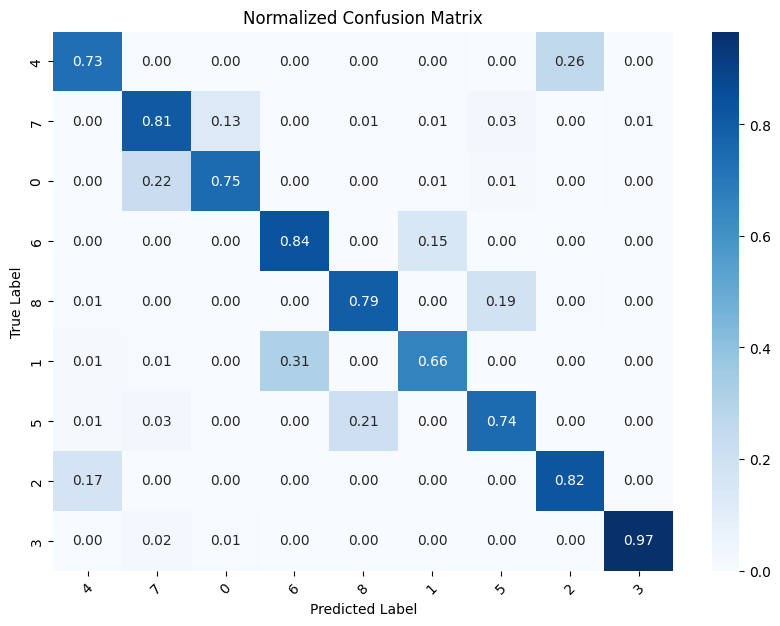

In [16]:
#visualize the classification report
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Get the unique labels from the original target variable
unique_labels = clustered_data['Cluster'].unique()

# Create a heatmap with proper labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()